## **Avance del Proyecto** - Preprocesamiento de la información
* 20 de Marzo del 2025
#### ESCOM - IPN: *Modelado Predictivo*
#### Prof. Claudia Blanquel

#### *Lic. Ciencia de Datos* - 6AM1

> Armas Ramirez Daniel

> Gutierrez Ramirez Alana Sofia

> Hernández Peña Irving Jafet

> Reyes Maldonado Oscar Romario

> Sanchez Garcia Miguel Alexander

#### **0° Intro**

Datos obtenidos de la ENIGH:

> https://www.inegi.org.mx/programas/enigh/nc/2016/#datos_abiertos

**a.** Importar todas las librerias necesarias

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

* Cargar los datos

In [65]:
concentradohogar_df = pd.read_csv('conjunto_de_datos_concentradohogar_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_concentradohogar_enigh_2016_ns.csv')

#### **1° EDA (Exploratory Data Analysis)**

##### *Datos generales*

**a.** Dimensiones del conjunto de datos

In [66]:
print('Rows: ' + str(concentradohogar_df.shape[0]))
print('Columns: ' + str(concentradohogar_df.shape[1]))

Rows: 70311
Columns: 127


**b.** Descripción del conjunto de datos

In [67]:
# Información general del dataset
concentradohogar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70311 entries, 0 to 70310
Columns: 127 entries, folioviv to smg
dtypes: float64(104), int64(22), object(1)
memory usage: 68.1+ MB


In [68]:
# Descripción de las columnas
concentradohogar_df.describe()

,folioviv,foliohog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,...,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg
count,7.031100e+04,70311.000000,7.031100e+04,70311.000000,70311.000000,70311.000000,70311.000000,70311.000000,70311.000000,70311.000000,...,70311.000000,70311.000000,70311.000000,7.031100e+04,70311.000000,70311.000000,70311.000000,70311.000000,7.031100e+04,7.031100e+04
mean,1.594219e+09,1.018660,1.573498e+08,2.490748,2.081566,248.168124,40260.677419,468.982961,2.148327,1.261595,...,282.491993,178.165304,104.326689,1.237495e+03,72.873507,655.895553,347.736328,310.604276,5.523523e+02,6.573600e+03
std,9.323485e+08,0.154555,9.340101e+07,1.313300,0.814018,157.146232,22836.807258,490.357613,0.618978,0.439506,...,2932.440863,1867.760491,1537.187923,1.327277e+04,1308.282953,4924.291953,2655.765101,4456.985605,3.466109e+04,3.638005e-12
min,1.000038e+08,1.000000,1.001000e+07,1.000000,1.000000,1.000000,10.000000,7.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.573600e+03
25%,7.621785e+08,1.000000,7.106000e+07,1.000000,2.000000,111.000000,19640.000000,174.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.573600e+03
50%,1.562090e+09,1.000000,1.512100e+08,2.000000,2.000000,244.000000,40440.000000,336.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.573600e+03
75%,2.402681e+09,1.000000,2.402800e+08,4.000000,2.000000,377.000000,60050.000000,573.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.573600e+03
max,3.260802e+09,5.000000,3.205800e+08,4.000000,4.000000,536.000000,79010.000000,5169.000000,5.000000,2.000000,...,269005.510000,198895.020000,166304.340000,2.425845e+06,174130.430000,469565.210000,298342.540000,666697.490000,8.852459e+06,6.573600e+03


In [69]:
# Lista que contiene las columnas que se consideran categorías
categorias = ['folioviv', 'sexo_jefe', 'edad_jefe', 'educa_jefe', 'tot_integ', 'hombres', 'mujeres', 'mayores', 'menores', 
              'p12_64', 'p65mas', 'ocupados', 'percep_ing', 'perc_ocupa']

# Lista que contiene las columnas de ingresos
ingresos = ['ing_cor', 'percep_tot']

# Lista que contiene las columnas de gastos
gastos = ['gasto_mon', 'erogac_tot']

# Eliminamos las columnas que no son de interés (no están en las listas anteriores)
for columna in concentradohogar_df.columns:
    if columna not in categorias and columna not in ingresos and columna not in gastos:
        concentradohogar_df.drop(columna, axis=1, inplace=True)


In [70]:
# Revisar si hay valores nulos
concentradohogar_df.isnull().sum()

folioviv      0
sexo_jefe     0
edad_jefe     0
educa_jefe    0
tot_integ     0
hombres       0
mujeres       0
mayores       0
menores       0
p12_64        0
p65mas        0
ocupados      0
percep_ing    0
perc_ocupa    0
ing_cor       0
gasto_mon     0
percep_tot    0
erogac_tot    0
dtype: int64

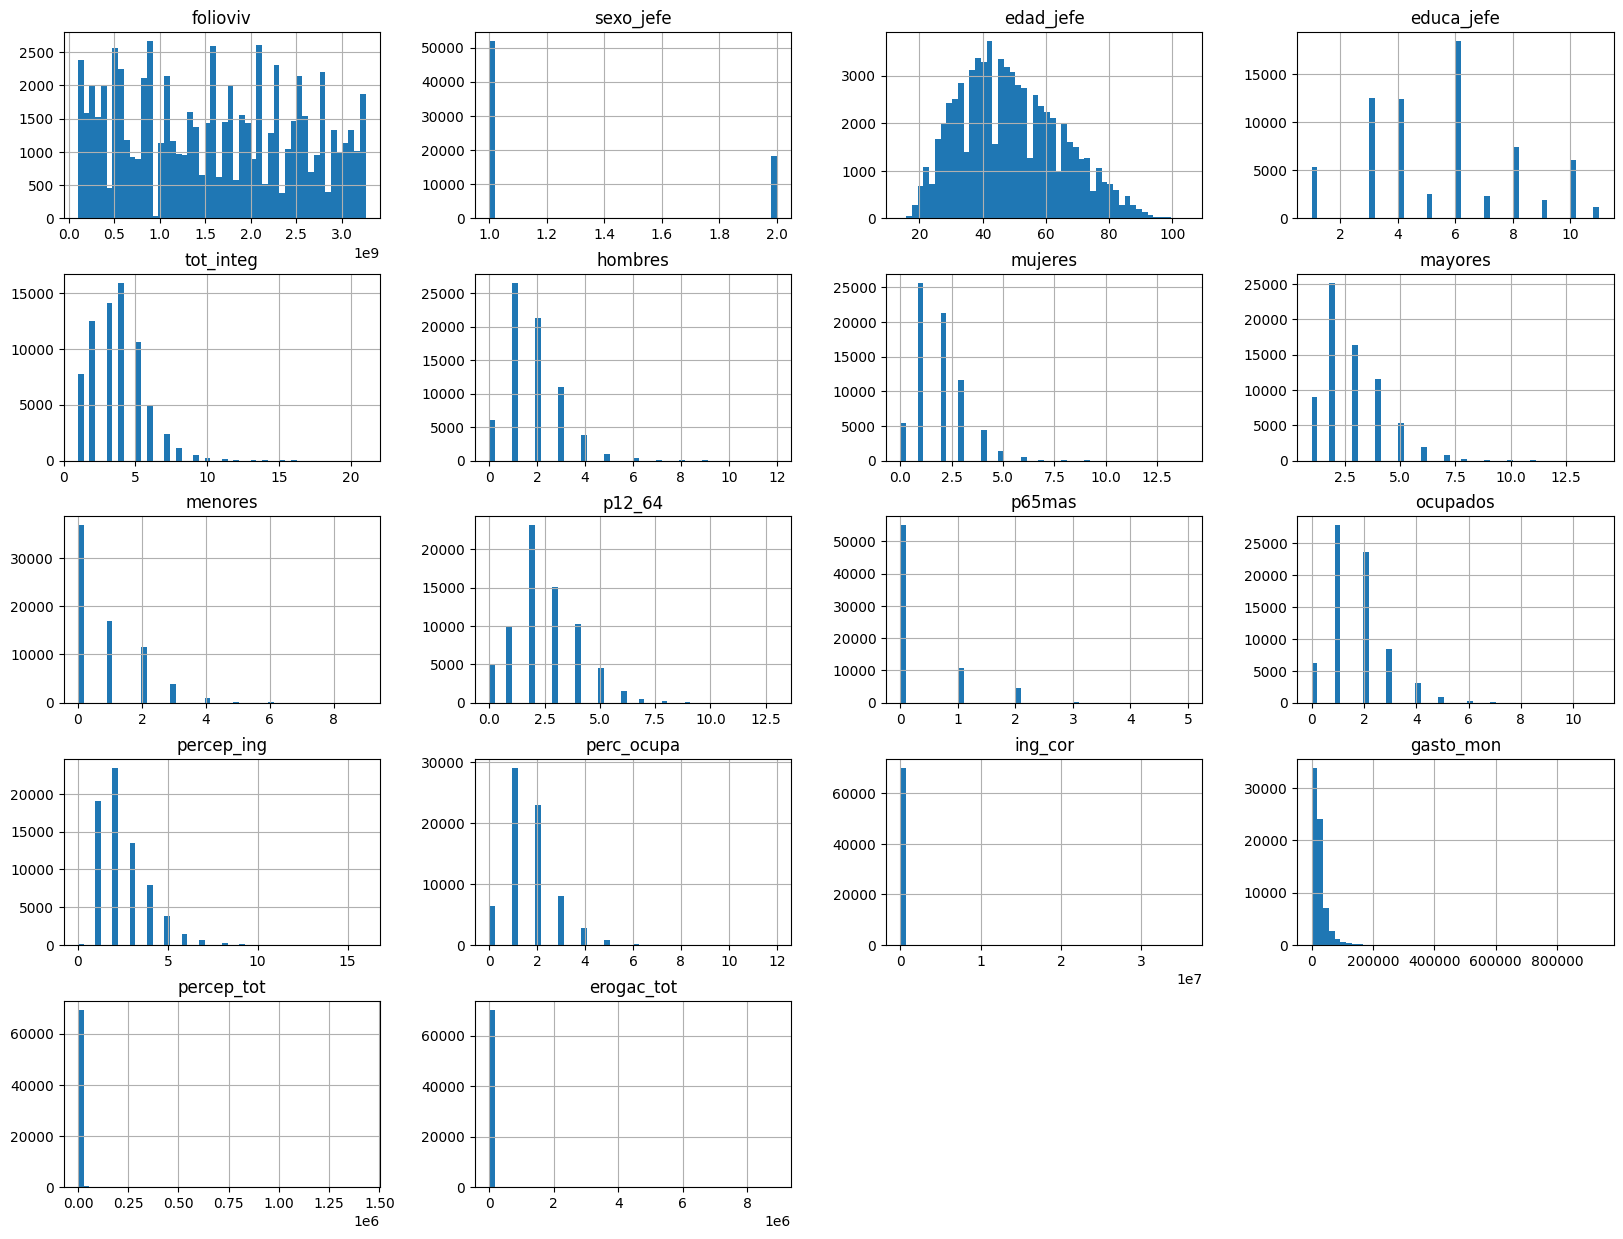

In [71]:
# Histograma para cada columna
concentradohogar_df.hist(bins=50, figsize=(20,15))
plt.show()

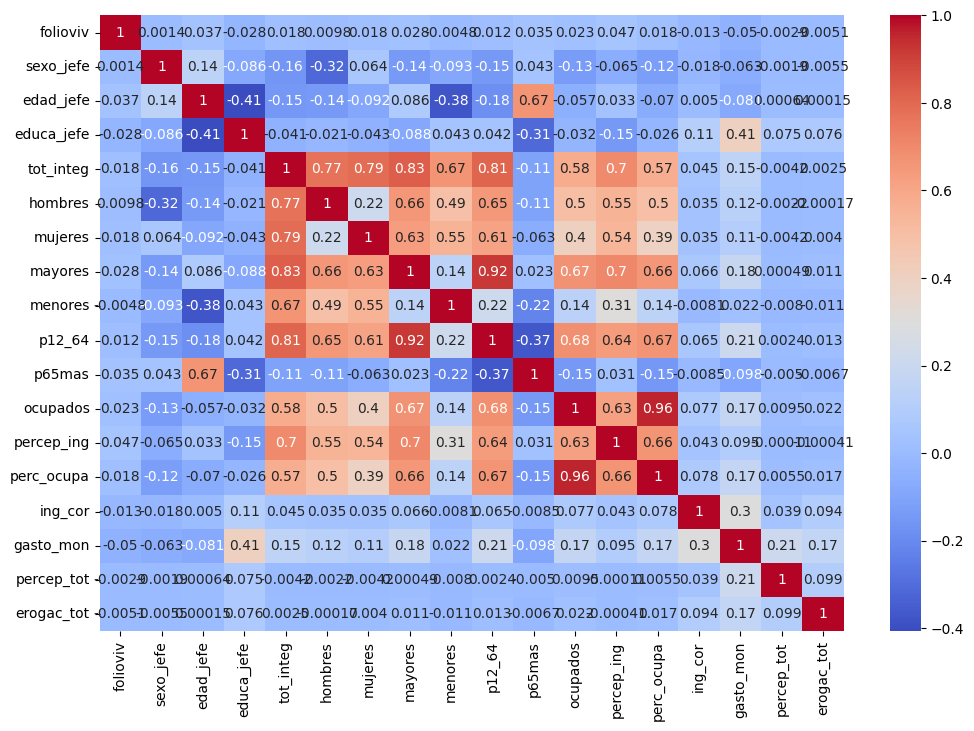

In [72]:

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(concentradohogar_df.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_16528\2911373623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos_df['folioviv'] = concentradohogar_df['folioviv']
C:\Users\oscar\AppData\Local\Temp\ipykernel_16528\2911373623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gastos_df['folioviv'] = concentradohogar_df['folioviv']


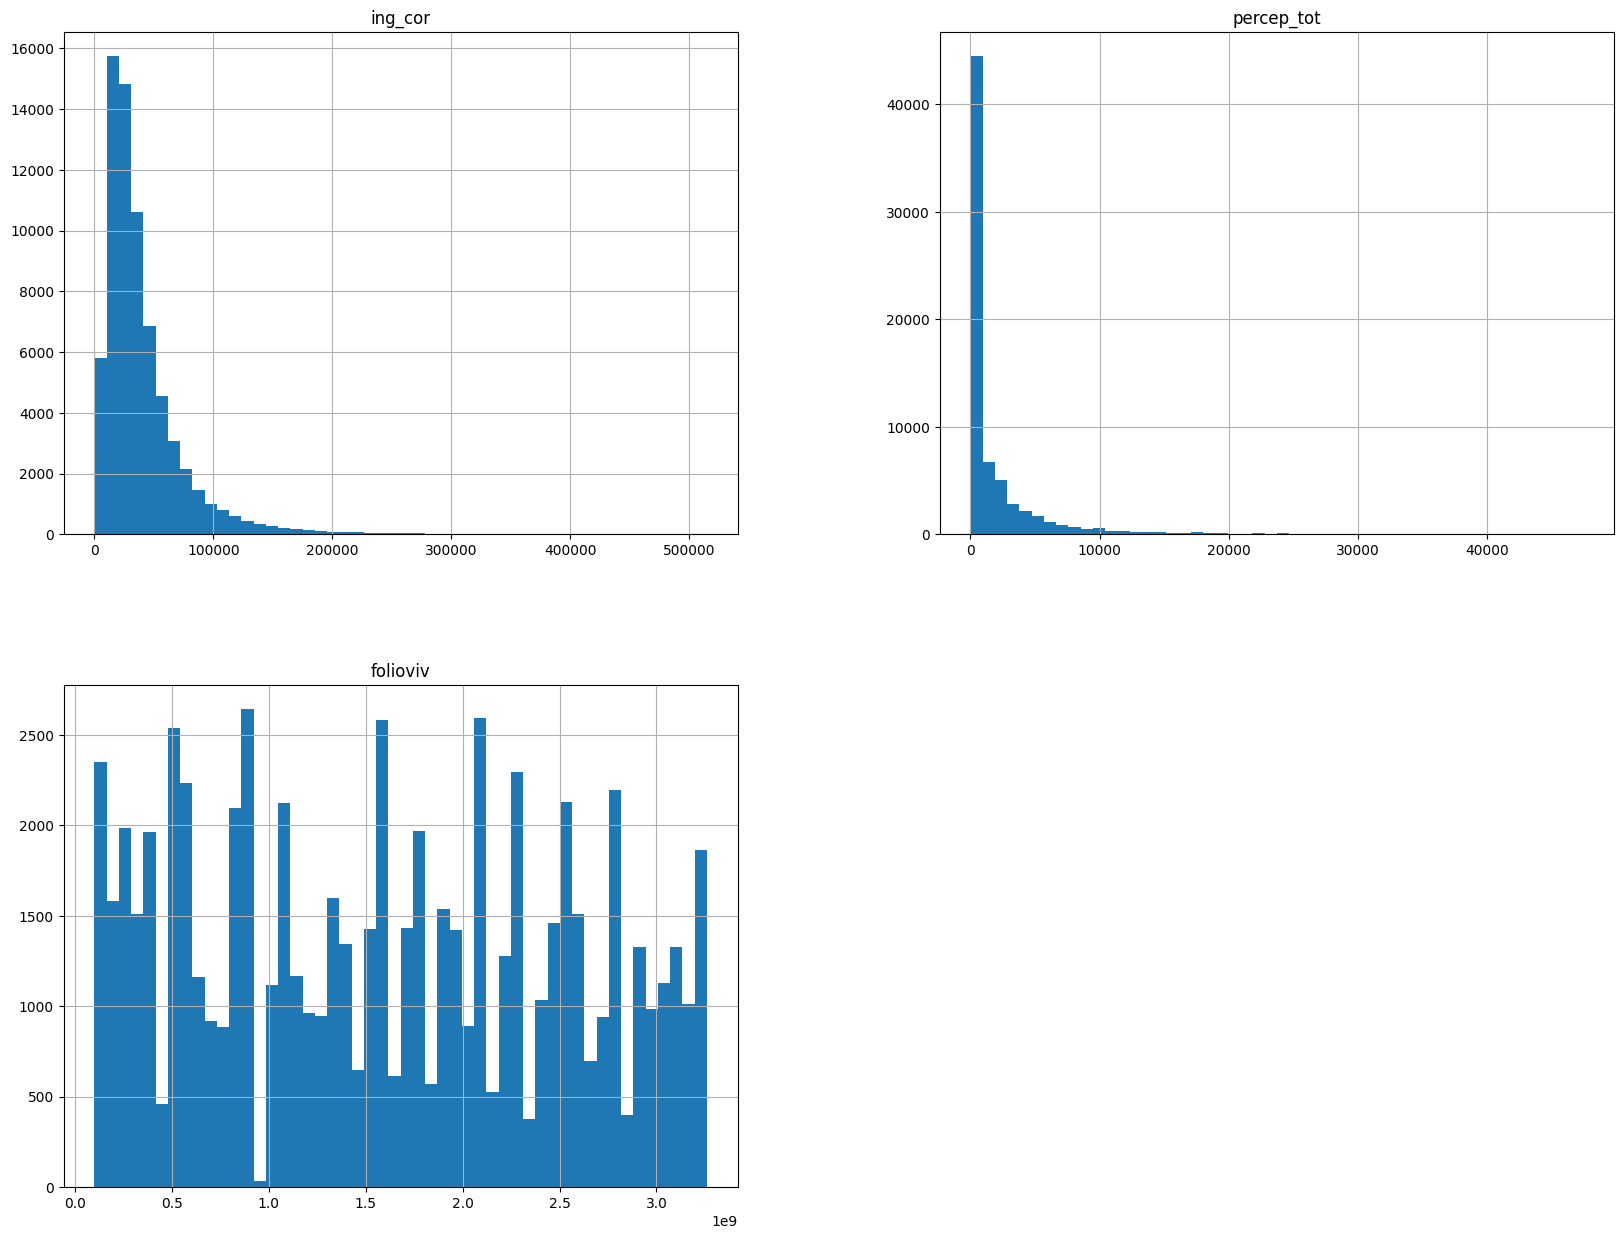

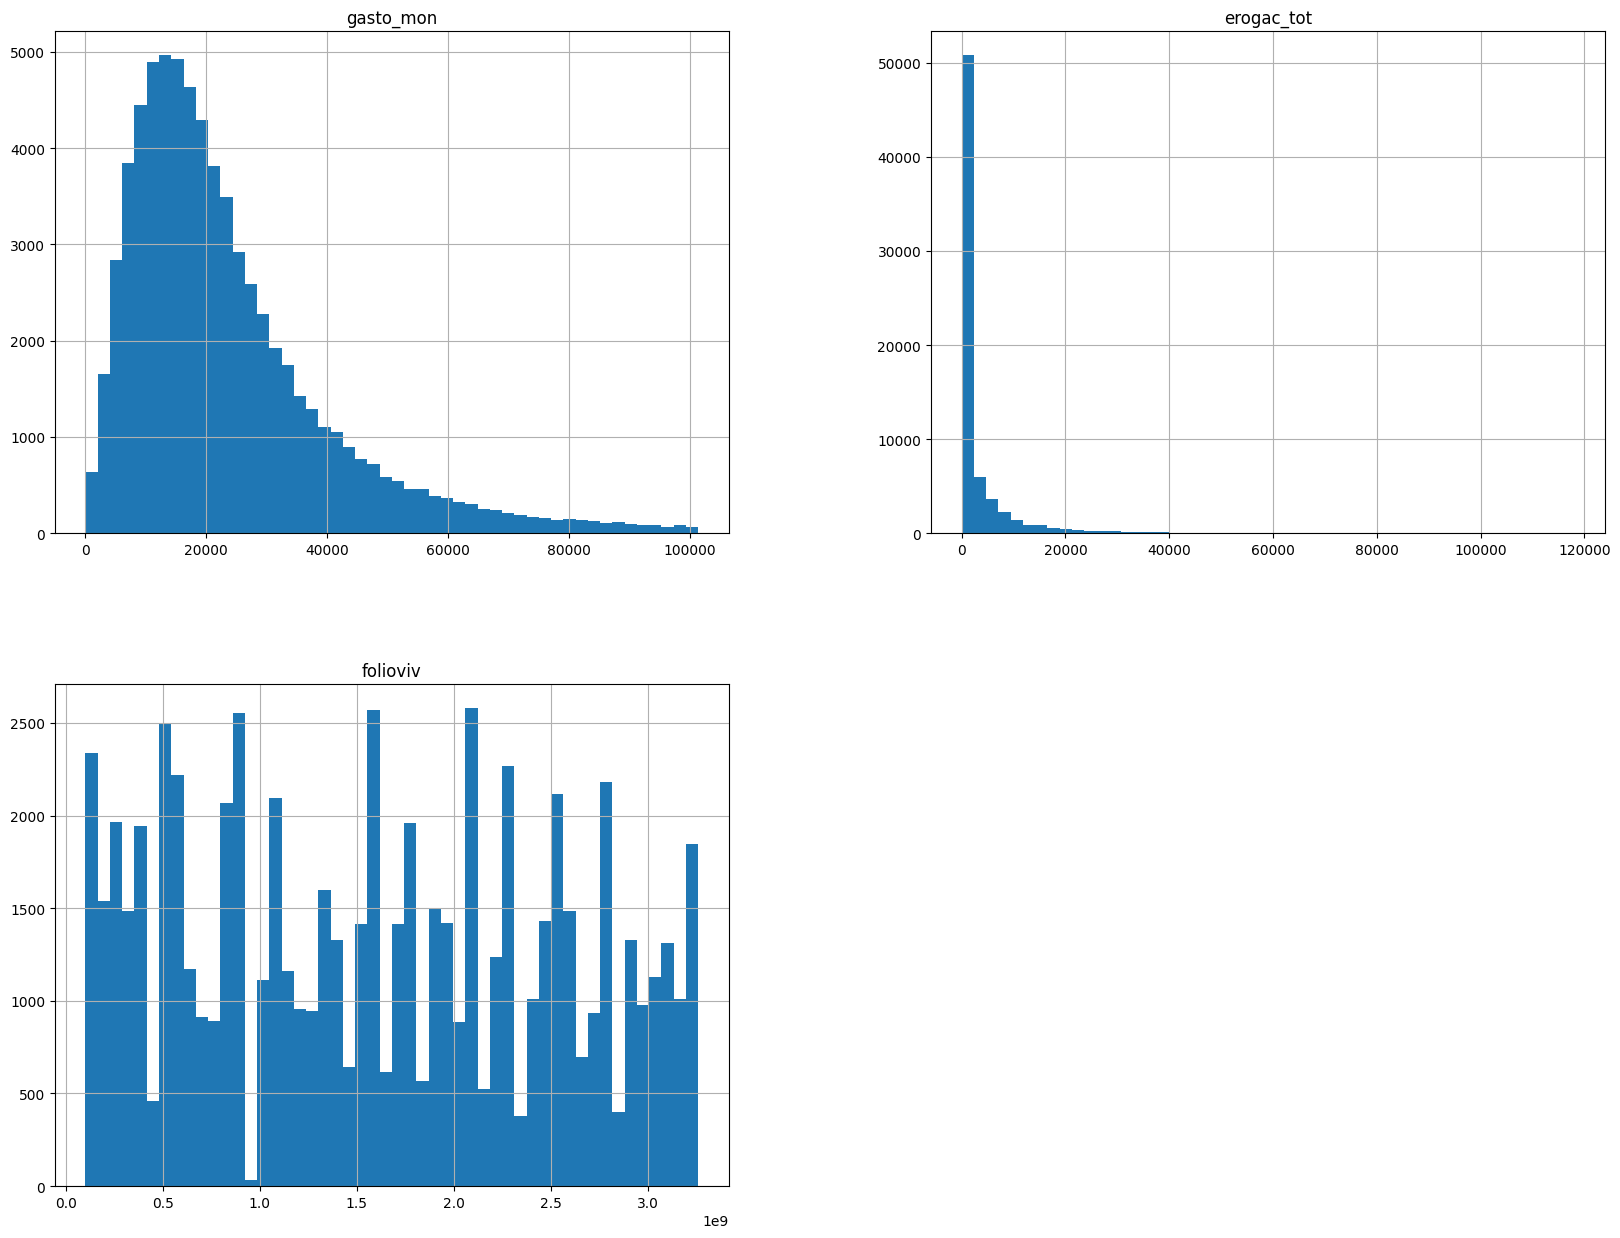

Ingresos: (69763, 3)
Gastos: (69078, 3)


In [73]:
# Filtar ingresos y gastos para eliminar valores atípicos
ingresos_df = concentradohogar_df[ingresos]
gastos_df = concentradohogar_df[gastos]

# Agregar columna con el folioviv
ingresos_df['folioviv'] = concentradohogar_df['folioviv']
gastos_df['folioviv'] = concentradohogar_df['folioviv']

# Eliminar valores atípicos
z_scores = stats.zscore(ingresos_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
ingresos_df = ingresos_df[filtered_entries]

z_scores = stats.zscore(gastos_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
gastos_df = gastos_df[filtered_entries]

# Histograma para cada columna
ingresos_df.hist(bins=50, figsize=(20,15))
plt.show()

gastos_df.hist(bins=50, figsize=(20,15))
plt.show()

# Dimensiones de los dataframes
print('Ingresos: ' + str(ingresos_df.shape))
print('Gastos: ' + str(gastos_df.shape))

Ingresos: (35468, 3)
Gastos: (32655, 3)


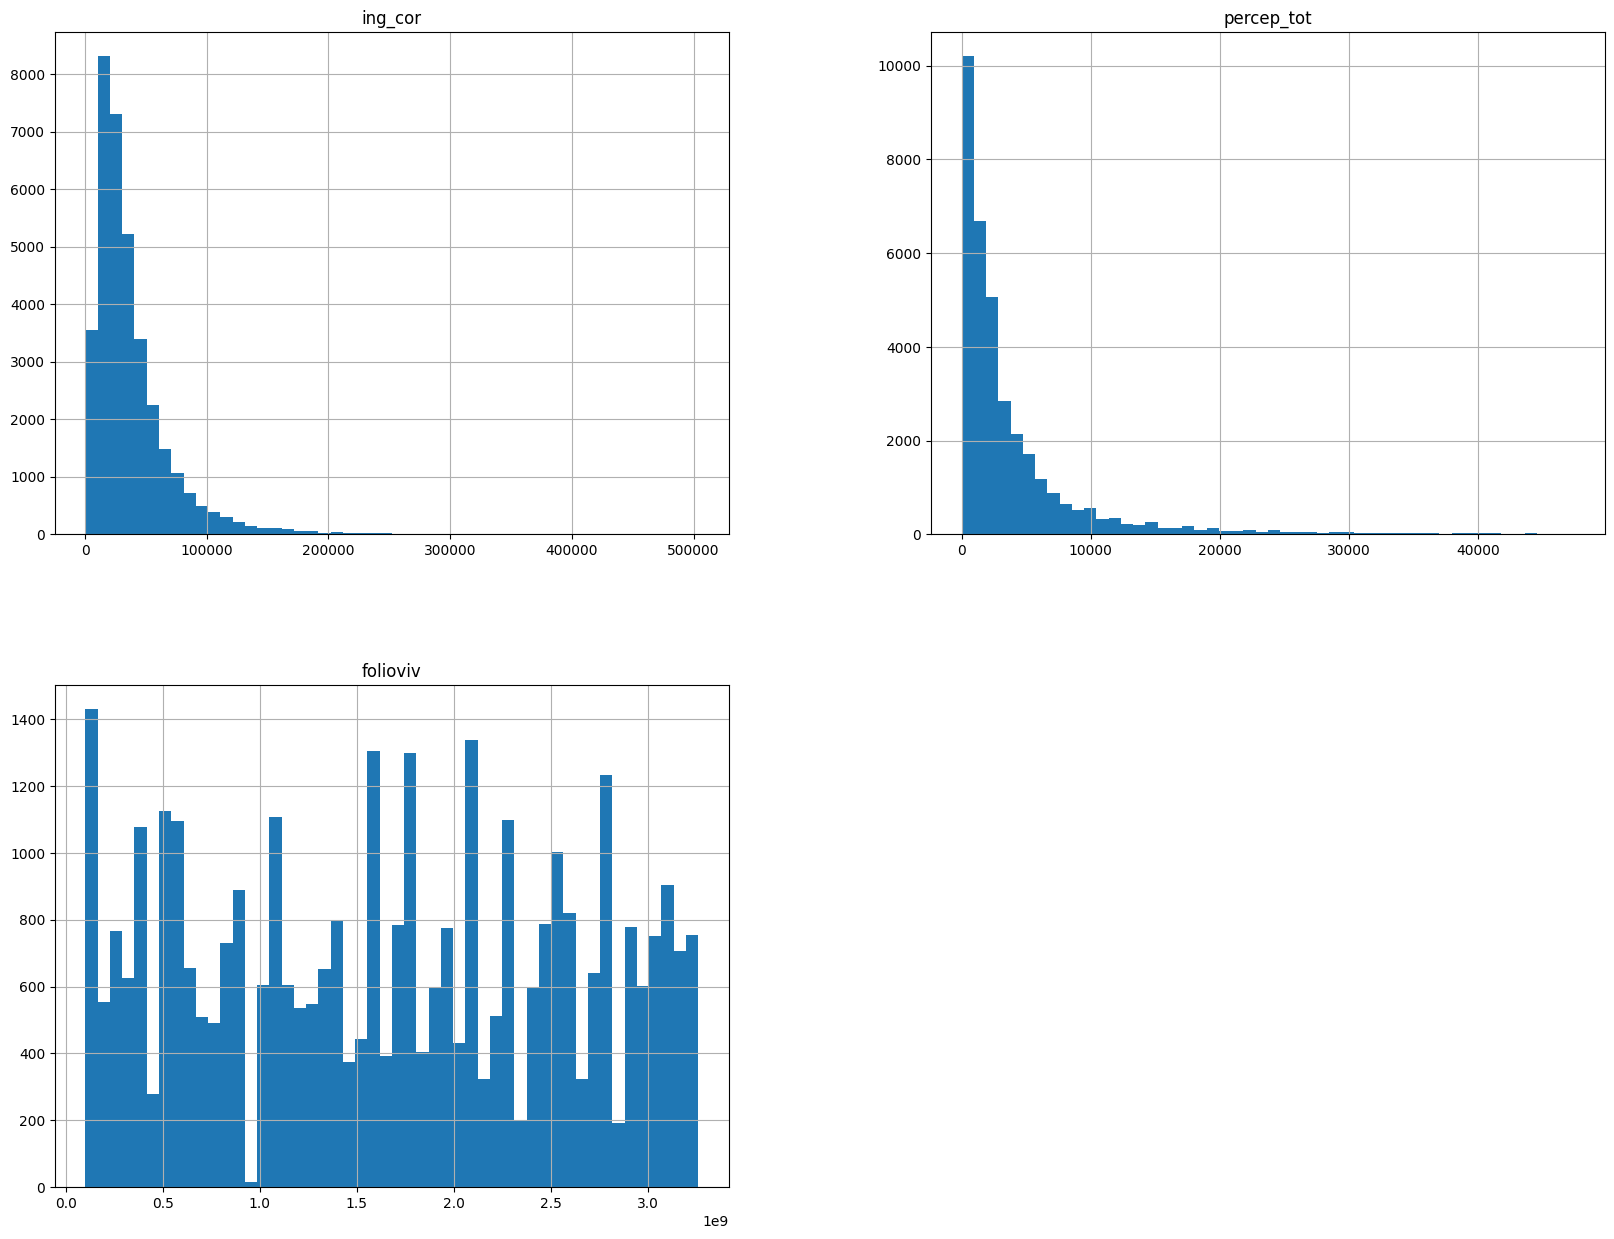

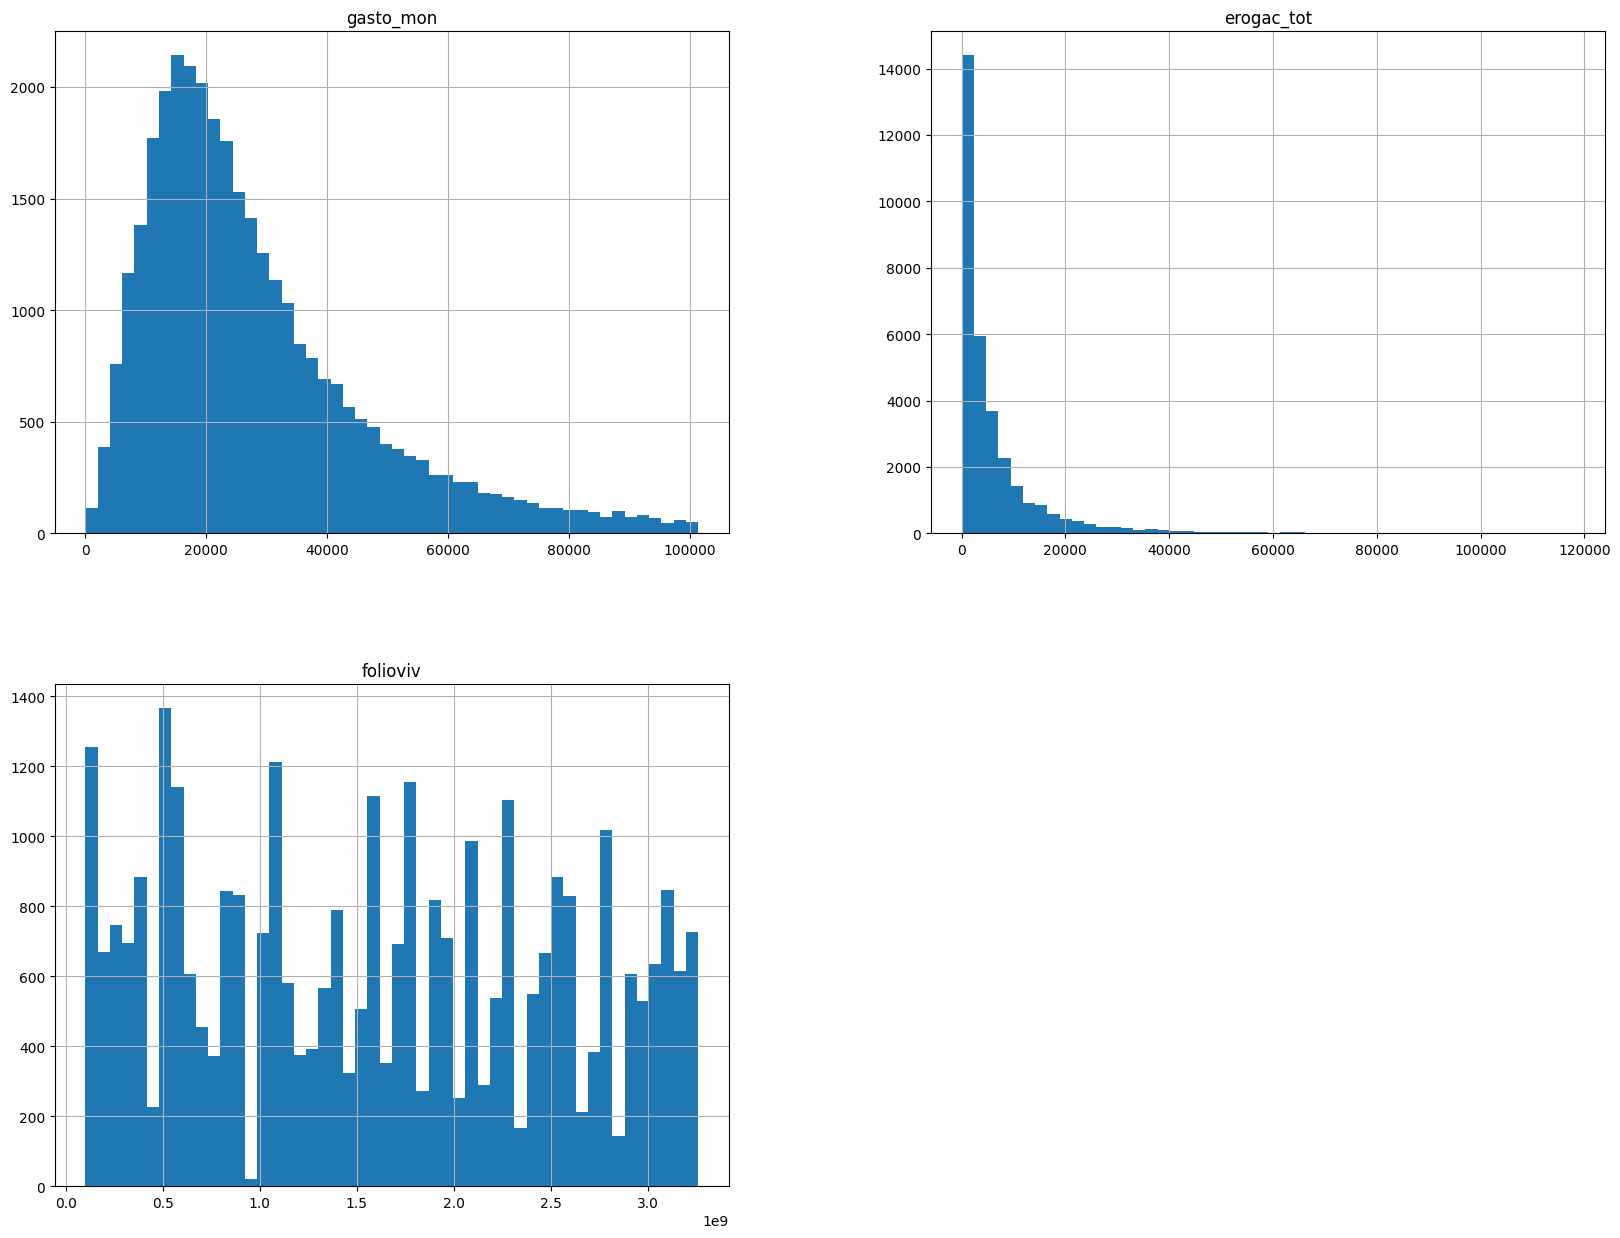

In [74]:
# Filtrar para quitar registros donde percepción de ingresos es 0
ingresos_df = ingresos_df[(ingresos_df['percep_tot'] > 0)]
ingresos_df = ingresos_df[(ingresos_df['ing_cor'] > 0)]

# Filtrar para quitar registros donde erogación total es 0
gastos_df = gastos_df[(gastos_df['erogac_tot'] > 0)]
gastos_df = gastos_df[(gastos_df['gasto_mon'] > 0)]

# Dimensiones de los dataframes
print('Ingresos: ' + str(ingresos_df.shape))
print('Gastos: ' + str(gastos_df.shape))

# Histograma para cada columna
ingresos_df.hist(bins=50, figsize=(20,15))
plt.show()

gastos_df.hist(bins=50, figsize=(20,15))
plt.show()

In [75]:
# Determinar una variable que categorice a los hogares si esta en endeudamiento o no
ingresos_df['total'] = ingresos_df['percep_tot'] + ingresos_df['ing_cor']
gastos_df['total'] = gastos_df['erogac_tot'] + gastos_df['gasto_mon']

# Combina los dataframes de ingresos y gastos segundo la variable folioviv
df = pd.merge(ingresos_df, gastos_df, on='folioviv', how='inner')

In [76]:
print(df.shape)
df.head()

# Determinar si el hogar está en endeudamiento
df['endeudamiento'] = df['total_x'] < df['total_y']

# Llevar endeudamiento a 1 y 0
df['endeudamiento'] = df['endeudamiento'].astype(int)
df.head()

(19619, 7)


,ing_cor,percep_tot,folioviv,total_x,gasto_mon,erogac_tot,total_y,endeudamiento
0,146616.16,880.43,100003802,147496.59,82427.75,5360.65,87788.40,0
1,62057.98,10285.71,100010406,72343.69,52283.26,929.34,53212.60,0
2,53101.87,5404.88,100041501,58506.75,22546.65,2186.41,24733.06,0
3,28519.44,391.30,100041502,28910.74,20471.38,635.86,21107.24,0
4,11773.75,3819.33,100062603,15593.08,13728.50,3336.39,17064.89,1


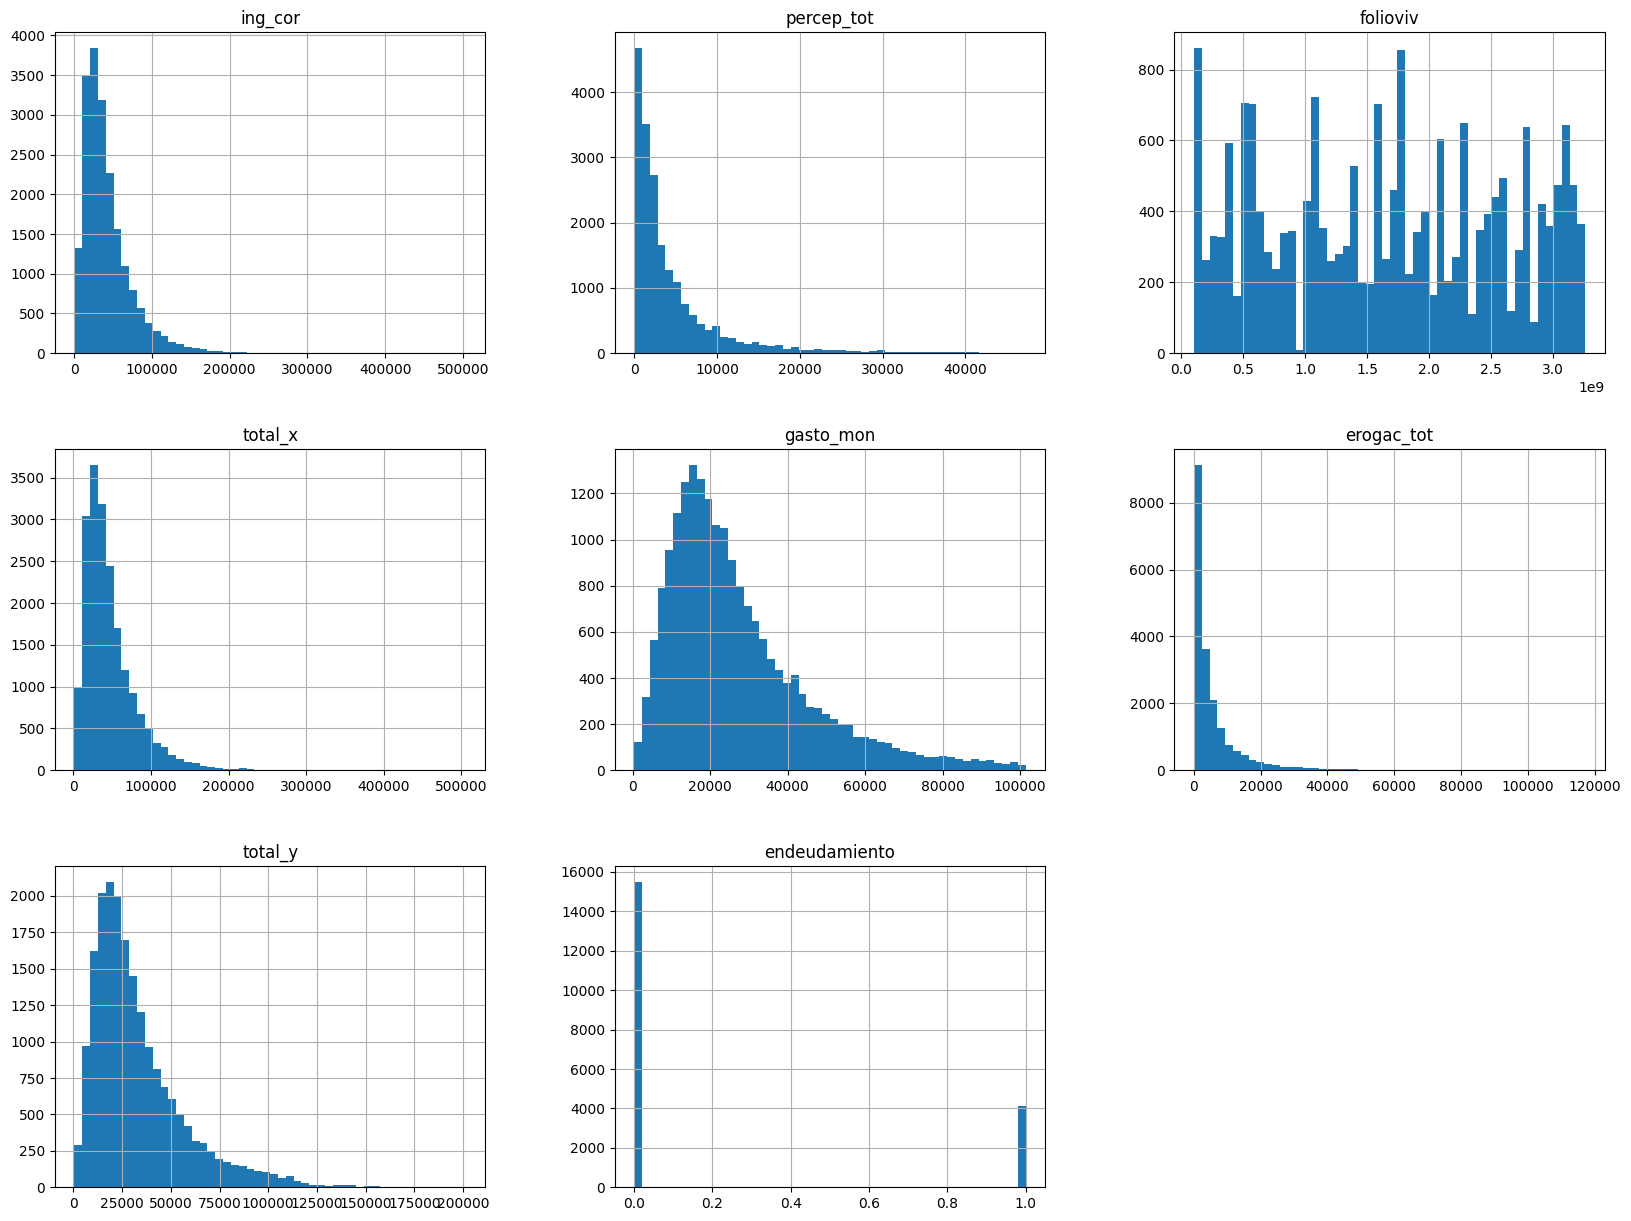

In [77]:
# Histograma para cada columna
df.hist(bins=50, figsize=(20,15))
plt.show()

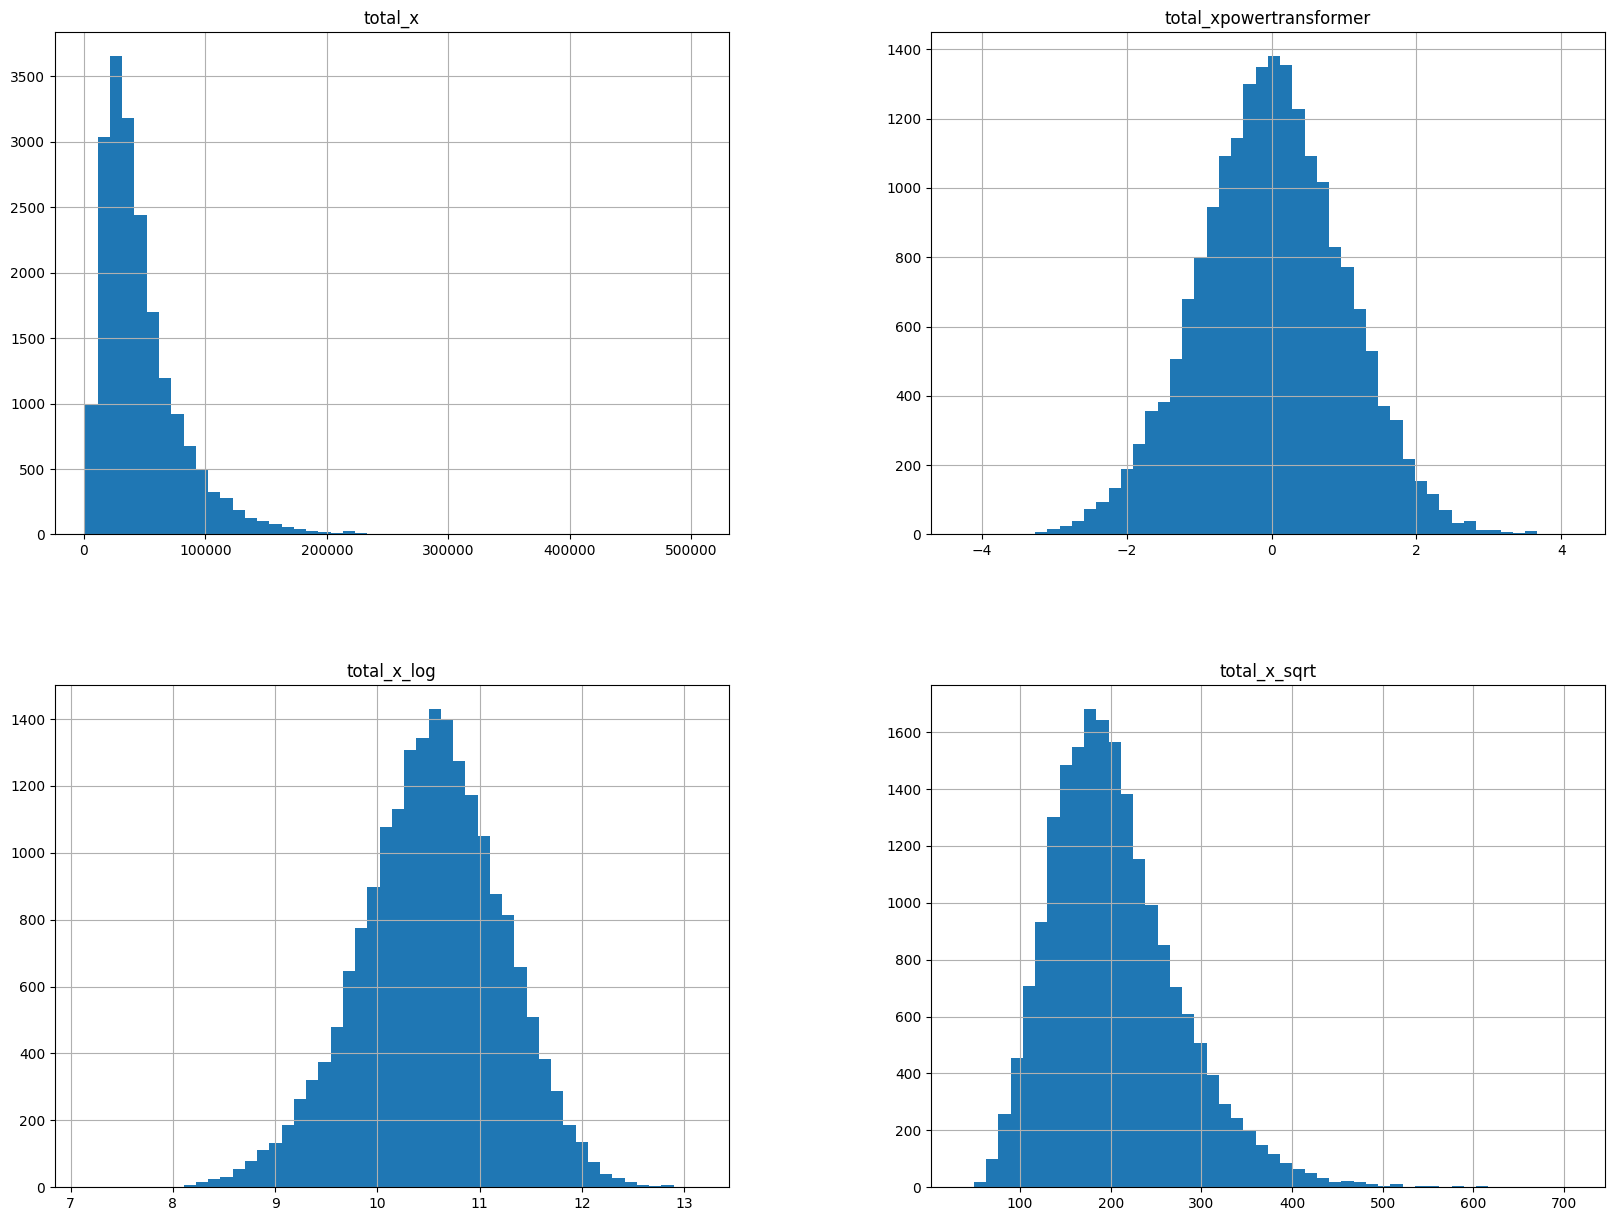

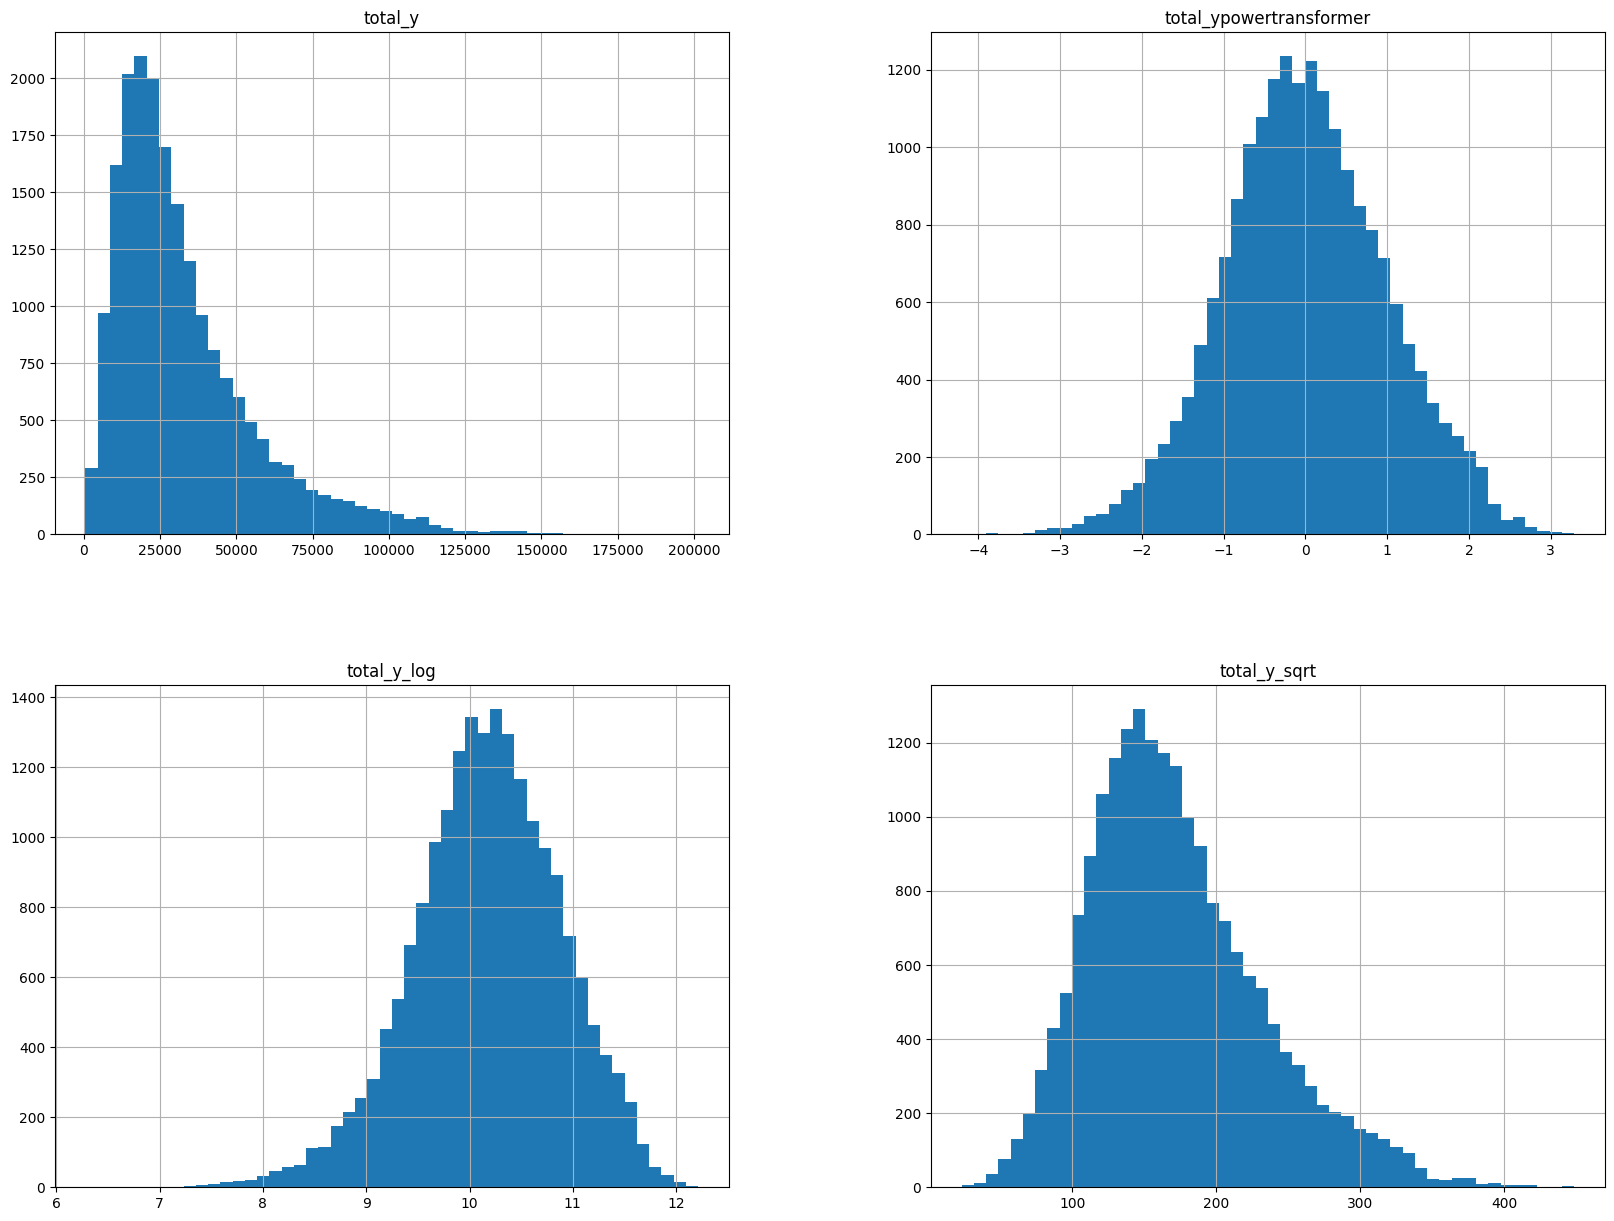

In [78]:
# Importar powertransformer
from sklearn.preprocessing import PowerTransformer
# Crear funcion que busque la mejor transformación para una columna
def buscar_transformacion(data, columna):
    # Definir un nuevo dataframe
    data_transform = pd.DataFrame()
    # Agregar la columna original
    data_transform[columna] = data[columna]
    # Transformar los datos com powertransformer
    pt = PowerTransformer()
    data_transform[columna + 'powertransformer'] = pt.fit_transform(data[[columna]])
    # Tranformar los datos con logaritmo
    data_transform[columna + '_log'] = np.log(data[columna] + 1)
    # Transformar los datos con raíz cuadrada
    data_transform[columna + '_sqrt'] = np.sqrt(data[columna])

    # Histograma para cada columna
    data_transform.hist(bins=50, figsize=(20,15))
    plt.show()

# Buscar la mejor transformación para la columna total_x
buscar_transformacion(df, 'total_x')
buscar_transformacion(df, 'total_y')

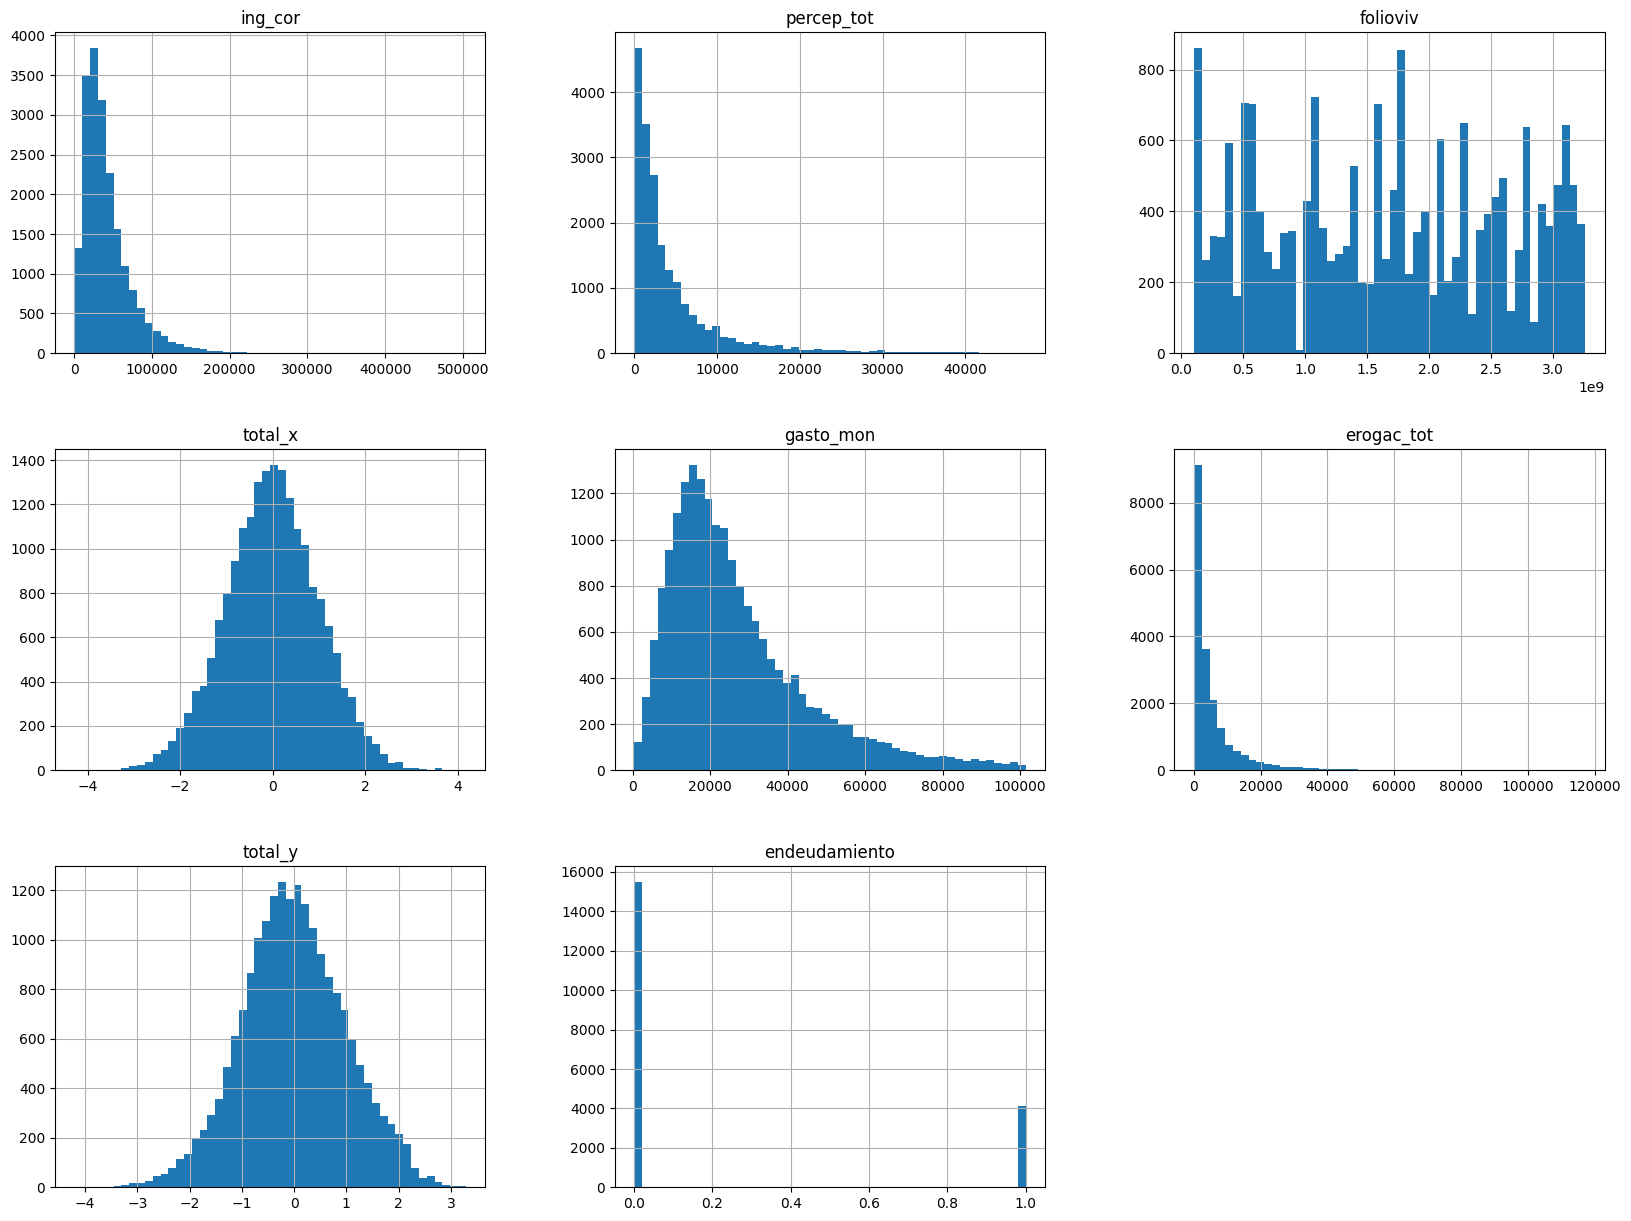

In [79]:
# Eligir la transformación que mejor se ajuste
def powertransformer(data):
    pt = PowerTransformer()
    return pt.fit_transform(data.values.reshape(-1, 1))

# Aplicar la transformación a las columnas
df['total_x'] = powertransformer(df['total_x'])
df['total_y'] = powertransformer(df['total_y'])

# Histograma para cada columna
df.hist(bins=50, figsize=(20,15))
plt.show()

In [82]:
# Eligir solo las variables x_total y y_total endeudamiento
df_total = df[['folioviv', 'total_x', 'total_y', 'endeudamiento']]

# Crear dataframe con las variables categoricas
df_categorias = concentradohogar_df[categorias]

# Merge de los dataframes
df_total = pd.merge(df_total, df_categorias, on='folioviv', how='inner')

print(df_total.shape)
df_total.head()

(21195, 17)


,folioviv,total_x,total_y,endeudamiento,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,menores,p12_64,p65mas,ocupados,percep_ing,perc_ocupa
0,100003802,2.076927,1.809901,0,1,29,10,2,1,1,2,0,2,0,2,2,2
1,100010406,0.956217,1.002128,0,1,53,10,4,2,2,4,0,4,0,2,2,2
2,100041501,0.634939,-0.124976,0,2,73,10,2,1,1,2,0,1,1,1,2,1
3,100041502,-0.391964,-0.342819,0,1,33,8,1,1,0,1,0,1,0,1,1,1
4,100062603,-1.242993,-0.627140,1,2,36,6,6,1,5,2,4,2,0,2,2,2


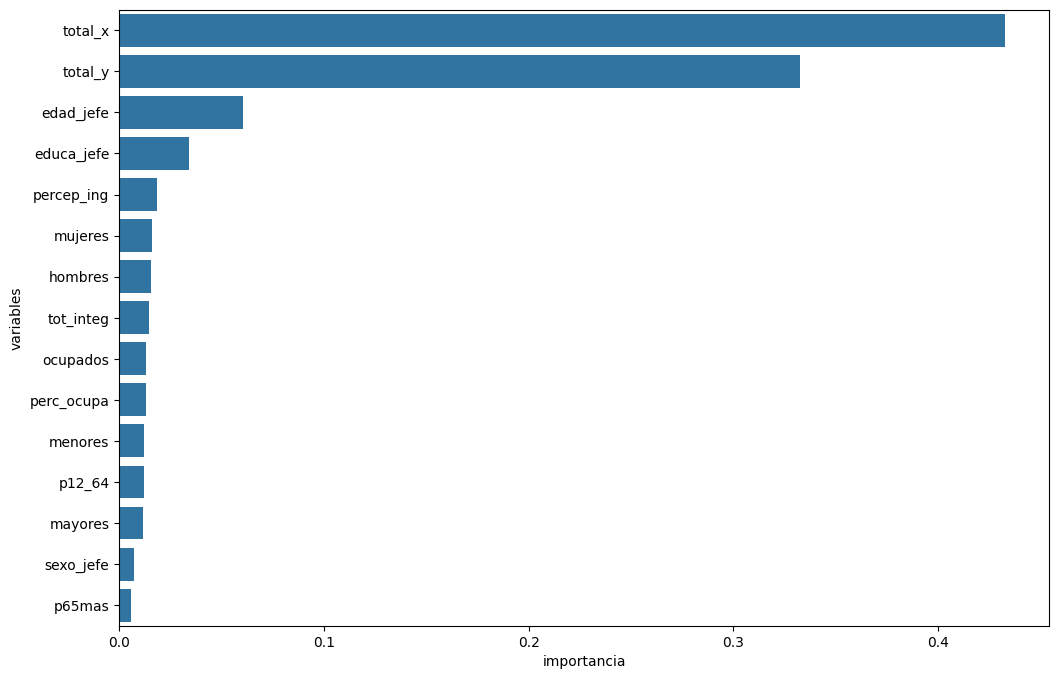

In [83]:
# Escoger las variables que aportan más información segun random forest

# Importar random forest
from sklearn.ensemble import RandomForestClassifier

# Crear un objeto de random forest
rf = RandomForestClassifier()

# Separar las variables x y y
X = df_total.drop(['folioviv', 'endeudamiento'], axis=1)
y = df_total['endeudamiento']

# Entrenar el modelo
rf.fit(X, y)

# Obtener la importancia de las variables
importancia = rf.feature_importances_

# Crear un dataframe con la importancia de las variables
df_importancia = pd.DataFrame({'variables': X.columns, 'importancia': importancia})
df_importancia = df_importancia.sort_values('importancia', ascending=False)

# Graficar la importancia de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='importancia', y='variables', data=df_importancia)
plt.show()

Accuracy: 0.9569114640666772
Precision: 0.9819432502149613
Recall: 0.8186379928315413
F1 Score: 0.8928850664581705


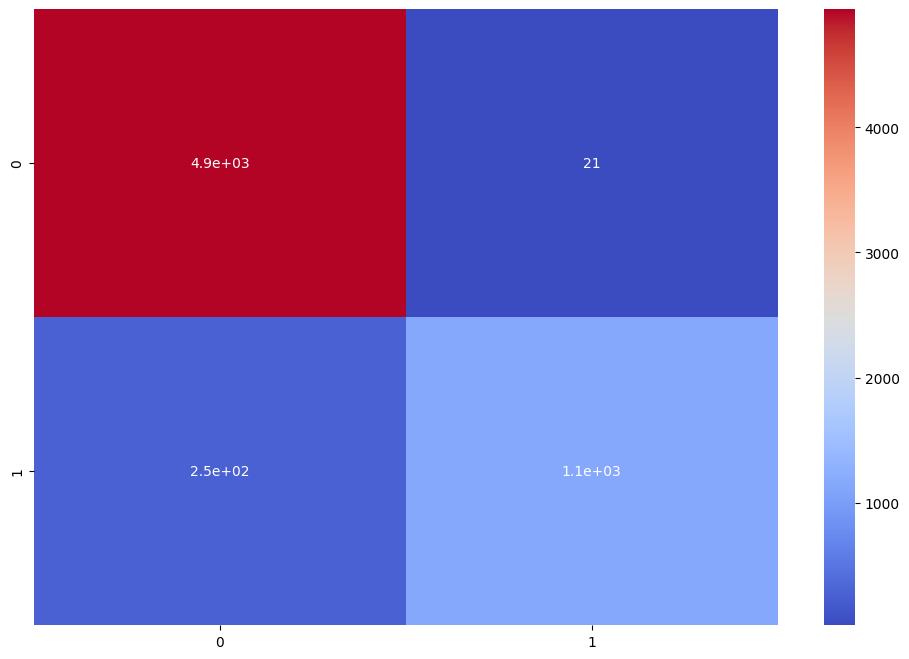

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4964
           1       0.98      0.82      0.89      1395

    accuracy                           0.96      6359
   macro avg       0.97      0.91      0.93      6359
weighted avg       0.96      0.96      0.96      6359



In [87]:
# Realizar predicciones
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf.predict(X_test)

# Metricas de evaluación
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))
print('F1 Score: ' + str(f1_score(y_test, y_pred)))

# Graficar la matriz de confusión
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))